In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\sadha\OneDrive\Desktop\PROJECTS\Financial-Fraud-Detection\Fin-Fraud-dataset.csv")

In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
data["isFraud"].unique()

array([0, 1], dtype=int64)

In [9]:
data["isFlaggedFraud"].unique()

array([0, 1], dtype=int64)

In [10]:
data.isnull().sum().max()

0

EDA

isFlaggedFraud
0    99.999749
1     0.000251
Name: proportion, dtype: float64


<Axes: xlabel='isFlaggedFraud'>

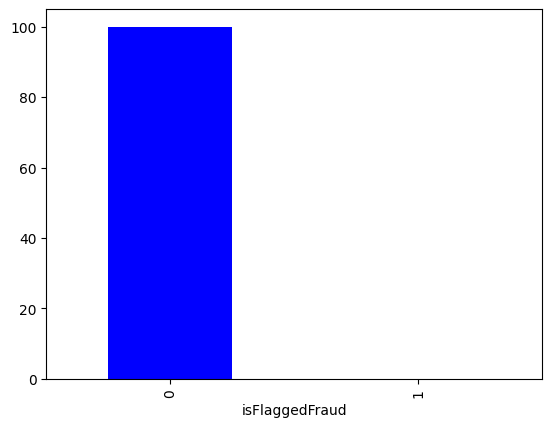

In [12]:
print(data['isFlaggedFraud'].value_counts(normalize=True)*100)
data['isFlaggedFraud'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['blue', 'red'])  

<Axes: xlabel='type'>

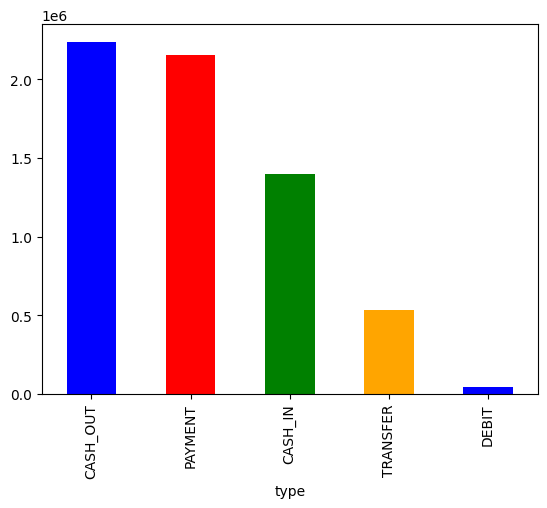

In [13]:
data['type'].value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'orange'])

<Axes: xlabel='type'>

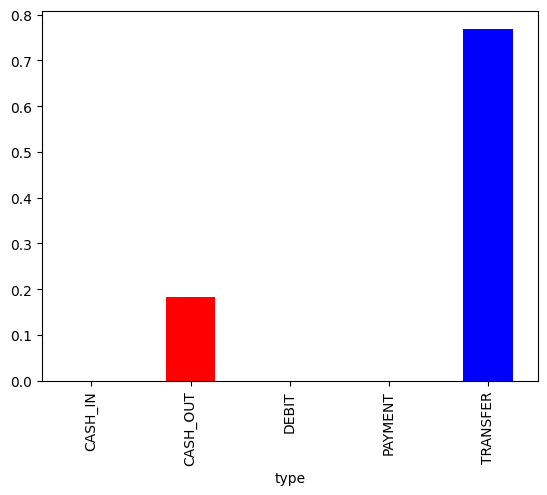

In [14]:
data.groupby('type')['isFraud'].mean().mul(100).plot(kind='bar', color=['blue', 'red', 'green', 'orange']) 

<Axes: xlabel='type'>

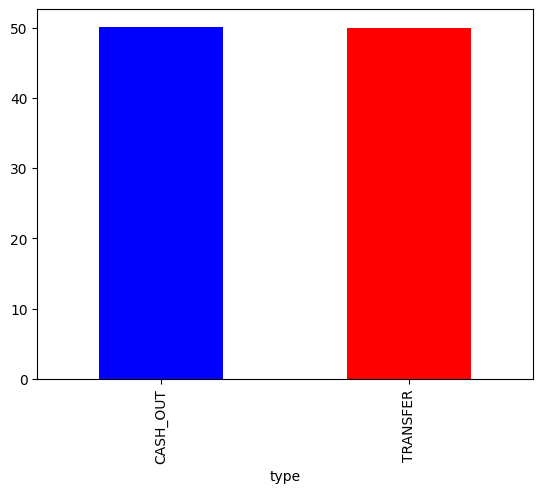

In [15]:
data[data['isFraud'] == 1]['type'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['blue', 'red', 'green', 'orange'])

In [17]:
data = data.loc[data['type'].isin(['CASH_OUT','TRANSFER']),:]
print('The new data now has ', len(data), ' transactions.')


The new data now has  2770409  transactions.


Data Sanity Checks

In [18]:
print(sum(data['amount']<0))

0


In [19]:
print(sum(data['amount']==0))

16


In [20]:
data = data.loc[data['amount']>0,:]

In [21]:
print((data['oldbalanceOrg']==0).value_counts(normalize=True)*100)

oldbalanceOrg
False    52.766052
True     47.233948
Name: proportion, dtype: float64


In [22]:
print((data['newbalanceDest']==0).value_counts(normalize=True)*100)

newbalanceDest
False    99.40106
True      0.59894
Name: proportion, dtype: float64


C:\Users\sadha\AppData\Local\Temp\ipykernel_2740\1948836574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='step', data=data[data['isFraud']==1], palette=sns.color_palette("husl", len(fraud_counts)))


<Axes: xlabel='step', ylabel='count'>

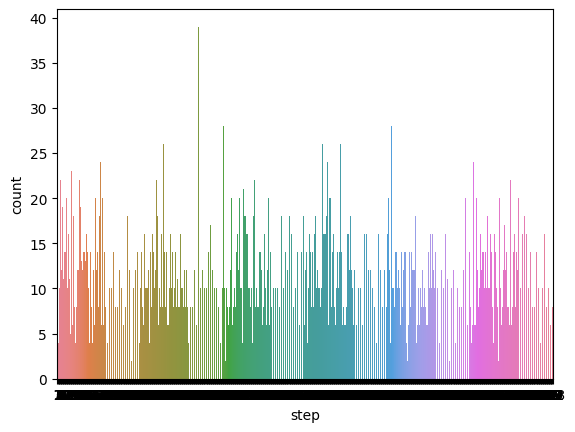

In [23]:
fraud_counts = data[data['isFraud'] == 1]['step'].value_counts().sort_index().reset_index()
sns.countplot(x='step', data=data[data['isFraud']==1], palette=sns.color_palette("husl", len(fraud_counts)))

C:\Users\sadha\AppData\Local\Temp\ipykernel_2740\2502653267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='step', data=data[data['isFraud']==0], palette=sns.color_palette("husl", len(fraud_counts)))


<Axes: xlabel='step', ylabel='count'>

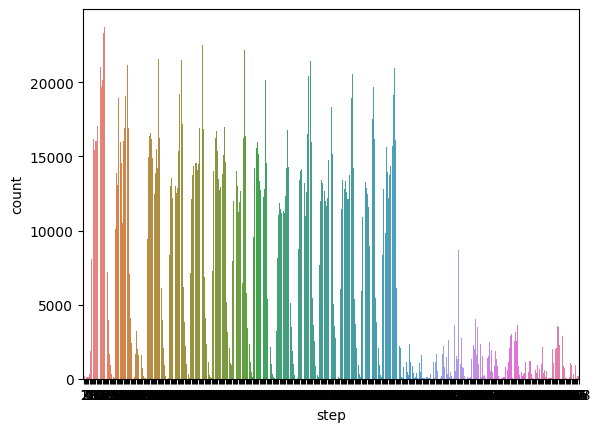

In [24]:
fraud_counts = data[data['isFraud'] == 0]['step'].value_counts().sort_index().reset_index()
sns.countplot(x='step', data=data[data['isFraud']==0], palette=sns.color_palette("husl", len(fraud_counts)))

In [ ]:

plt.figure(figsize=(8,6))
sns.stripplot(
    x="isFraud",
    y=data["amount"]/1e8,
    data=data,
    jitter=0.3,          # slightly more separation
    alpha=0.7,           # more noticeable dots        
    size=1.5
)
plt.xticks([0,1], ["Non-Fraud","Fraud"], fontsize=13)
plt.title("Distribution of Inaccuracy in Destination Account Balances", fontsize=15, fontweight='bold')
plt.xlabel("")
plt.ylabel("Destination Balance Inaccuracy", fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
data.columns

In [25]:
data['origBalance_inacc'] = data['oldbalanceOrg'] - data['amount']
data['destBalance_inacc'] = data['newbalanceDest'] + data['amount']

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(
    x="isFraud",
    y=data["origBalance_inacc"]/1e8,
    data=data,
    jitter=0.3,          # slightly more separation
    alpha=0.7,           # more noticeable dots        
    size=1.5
)
plt.xticks([0,1], ["Non-Fraud","Fraud"], fontsize=13)
plt.title("Distribution of Inaccuracy in originator Account Balances", fontsize=15, fontweight='bold')
plt.xlabel("")
plt.ylabel("Destination Balance Inaccuracy", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(
    x="isFraud",
    y=data["destBalance_inacc"]/1e8,
    data=data,
    jitter=0.3,          # slightly more separation
    alpha=0.7,           # more noticeable dots        
    size=1.5
)
plt.xticks([0,1], ["Non-Fraud","Fraud"], fontsize=13)
plt.title("Distribution of Inaccuracy in originator Account Balances", fontsize=15, fontweight='bold')
plt.xlabel("")
plt.ylabel("Destination Balance Inaccuracy", fontsize=13)
plt.tight_layout()
plt.show()

In [26]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'origBalance_inacc', 'destBalance_inacc'],
      dtype='object')

In [27]:
data = data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [28]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'origBalance_inacc',
       'destBalance_inacc'],
      dtype='object')

In [29]:
data['isFraud'].unique()

array([1, 0], dtype=int64)

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [33]:
data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'origBalance_inacc', 'destBalance_inacc',
       'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')

In [32]:
data = pd.get_dummies(data, columns=['type'], prefix=['type'])


In [35]:


# 2. Scale all features except the target 'isFraud'
features = data.loc[:, data.columns != 'isFraud']
target = data['isFraud']

std_scaler = StandardScaler()
features_scaled = pd.DataFrame(std_scaler.fit_transform(features), columns=features.columns)

# 3. Combine scaled features and target into a new DataFrame (optional)
data_scaled = features_scaled.copy()
data_scaled['isFraud'] = target.values  # add target back, ensure alignment

# 4. Split into features and target for model training
X = data_scaled.loc[:, data_scaled.columns != 'isFraud']
y = data_scaled['isFraud']  # as a Series (1D)

# 5. Perform train-test split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y  # stratify to preserve class distribution
)

# 6. Encode labels correctly:
label_encoder = LabelEncoder()
y_train_original = label_encoder.fit_transform(y_train_original)      # fit only on train
y_test_original = label_encoder.transform(y_test_original)            # transform test using same encoder

# 7. Check unique classes to confirm only 0 and 1, no '2'
print("Unique classes in y_train:", np.unique(y_train_original))
print("Unique classes in y_test:", np.unique(y_test_original))


Unique classes in y_train: [0 1]
Unique classes in y_test: [0 1]


In [36]:
train_pct = pd.Series(y_train_original).value_counts(normalize=True)[1]*100
test_pct  = pd.Series(y_test_original).value_counts(normalize=True)[1]*100

print(f"Class imbalance in train dataset: {train_pct:.3f}%")
print(f"Class imbalance in test dataset: {test_pct:.3f}%")


Class imbalance in train dataset: 0.296%
Class imbalance in test dataset: 0.296%


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Metric for evaluation
scr = 'recall'
accuracy_dict = {}

# Define models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

# Stratified 5-fold cross validation (to handle class imbalance)
skf = StratifiedKFold(5)


In [38]:
# Train Logistic Regression with cross-validation
sc_lr = cross_val_score(model_lr, X_train_original, y_train_original, cv=skf, scoring=scr)

print("Logistic Regression's average recall score across validation sets is:",
      round(sc_lr.mean() * 100, 2), "%")

# Fit on training data
model_lr.fit(X_train_original, y_train_original)

# Predictions
y_train_pred_lr = model_lr.predict(X_train_original)
y_test_pred_lr = model_lr.predict(X_test_original)

# Evaluation
print("TRAINING PERFORMANCE (Logistic Regression):")
print(classification_report(y_train_original, y_train_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_train_original, y_train_pred_lr))

print("\nTEST PERFORMANCE (Logistic Regression):")
print(classification_report(y_test_original, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_original, y_test_pred_lr))


Logistic Regression's average recall score across validation sets is: 46.64 %
TRAINING PERFORMANCE (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1933537
           1       0.89      0.47      0.61      5738

    accuracy                           1.00   1939275
   macro avg       0.94      0.73      0.81   1939275
weighted avg       1.00      1.00      1.00   1939275

Confusion Matrix:
 [[1933196     341]
 [   3064    2674]]

TEST PERFORMANCE (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.89      0.45      0.60      2459

    accuracy                           1.00    831118
   macro avg       0.94      0.72      0.80    831118
weighted avg       1.00      1.00      1.00    831118

Confusion Matrix:
 [[828522    137]
 [  1355   1104]]


In [40]:
# Train Random Forest with cross-validation
sc_rf = cross_val_score(model_rf, X_train_original, y_train_original, cv=skf, scoring=scr)

print("Random Forest's average recall score across validation sets is:",
      round(sc_rf.mean() * 100, 2), "%")

# Fit on training data
model_rf.fit(X_train_original, y_train_original)

# Predictions
y_train_pred_rf = model_rf.predict(X_train_original)
y_test_pred_rf = model_rf.predict(X_test_original)

# Evaluation
print("TRAINING PERFORMANCE (Random Forest):")
print(classification_report(y_train_original, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train_original, y_train_pred_rf))

print("\nTEST PERFORMANCE (Random Forest):")
print(classification_report(y_test_original, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_original, y_test_pred_rf))


Random Forest's average recall score across validation sets is: 99.62 %
TRAINING PERFORMANCE (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1933537
           1       1.00      1.00      1.00      5738

    accuracy                           1.00   1939275
   macro avg       1.00      1.00      1.00   1939275
weighted avg       1.00      1.00      1.00   1939275

Confusion Matrix:
 [[1933537       0]
 [      0    5738]]

TEST PERFORMANCE (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       1.00      1.00      1.00      2459

    accuracy                           1.00    831118
   macro avg       1.00      1.00      1.00    831118
weighted avg       1.00      1.00      1.00    831118

Confusion Matrix:
 [[828659      0]
 [    10   2449]]
